In [2]:
### Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from unittest import main

In [ ]:
## Data Cleaning 
df = pd.read_csv("fcc-forum-pageviews.csv", 
                sep=",",
                header=0)
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df = df[(df['value'] >= df['value'].quantile(0.025)) &  # Removes data if page views are in bottom 2.5%
        (df['value'] <= df['value'].quantile(0.975))]   # Removes data if page views are in top 2.5%
print(df.head(5))

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
# Date is now an index so has to be accessed differently.
ax.plot(df.index, df['value'])
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()

KeyError: 'date'

year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
      10       27398.322581
      11       40448.633333
      12       27832.419355
2017  1        32785.161290
      2        31113.071429
Name: value, dtype: float64
   year  month         value
0  2016      5  19432.400000
1  2016      6  21875.105263
2  2016      7  24109.678571
3  2016      8  31049.193548
4  2016      9  41476.866667
5  2016     10  27398.322581
6  2016     11  40448.633333
7  2016     12  27832.419355
8  2017      1  32785.161290
9  2017      2  31113.071429


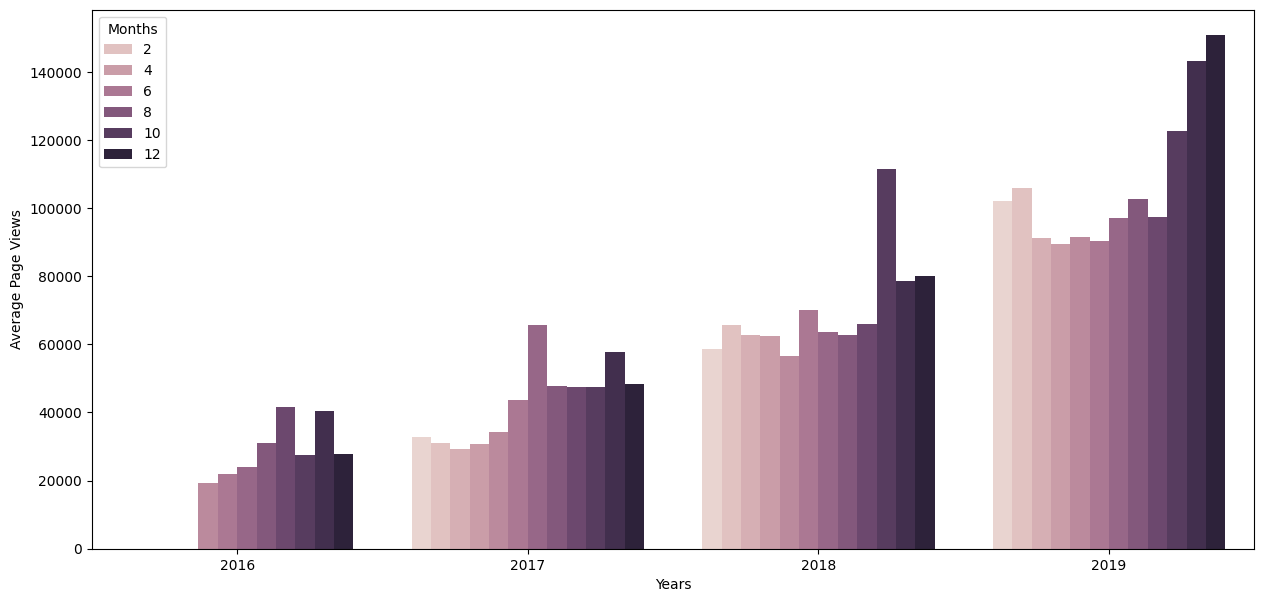

In [174]:
## Data Cleaning 
import calendar
df = pd.read_csv("fcc-forum-pageviews.csv", 
                sep=",",
                header=0)
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df = df[(df['value'] >= df['value'].quantile(0.025)) &  # Removes data if page views are in bottom 2.5%
        (df['value'] <= df['value'].quantile(0.975))]   # Removes data if page views are in top 2.5%
# Had a huge error here, when you use indexing it will create two columns with 'Date', invalid to then convert, must rename.
df_bar = df.groupby([df.index.year.rename('year'), df.index.month.rename('month')])['value'].mean()
print(df_bar.head(10))
df_bar = df_bar.reset_index()
df_bar.columns = ['year', 'month', 'value']

print(df_bar.head(10))


fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(df_bar, x = 'year', y = 'value', hue = 'month')
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.legend(title = "Months")
plt.show()


In [175]:
print(df_bar.groupby('year')['month'].count())

year
2016     8
2017    12
2018    12
2019    12
Name: month, dtype: int64


        date  value  year month
0 2016-05-19  19736  2016   May
1 2016-05-26  18060  2016   May
2 2016-05-27  19997  2016   May
3 2016-05-28  19044  2016   May
4 2016-05-29  20325  2016   May


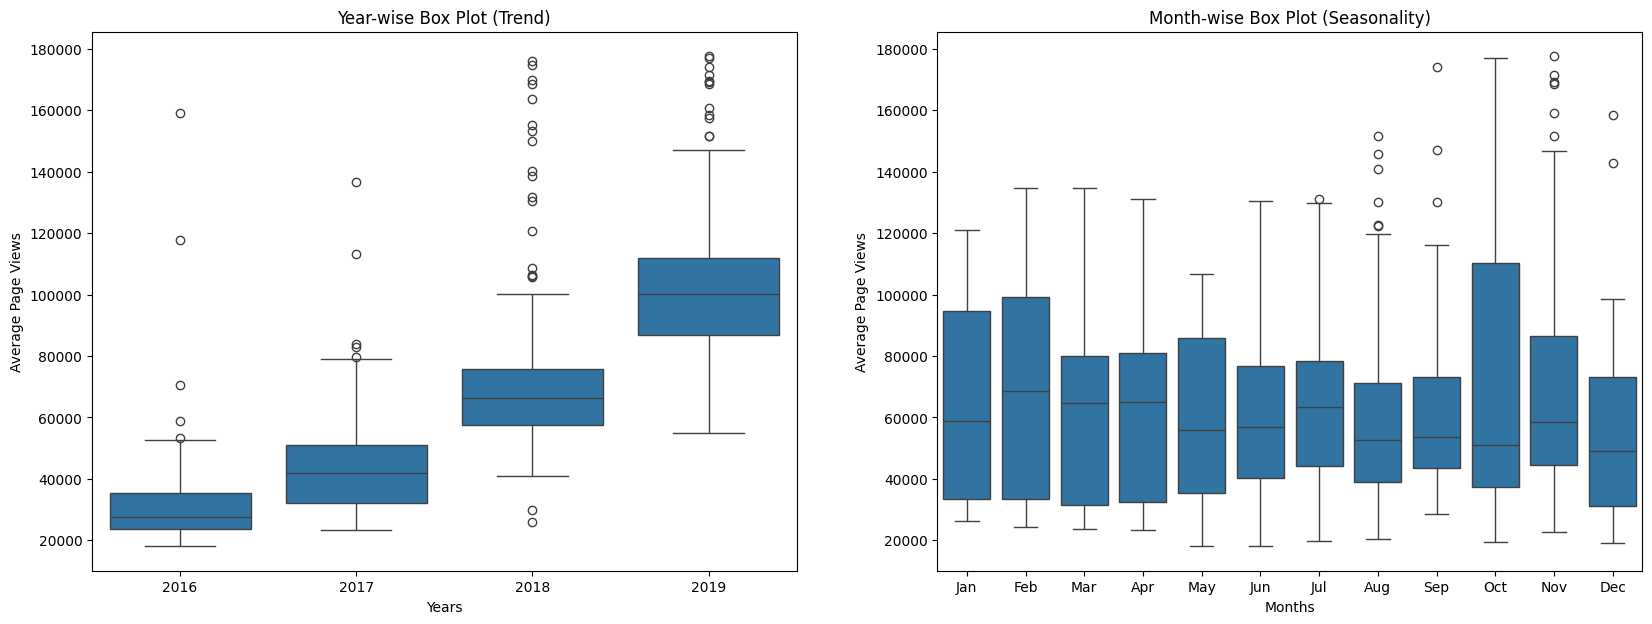

In [113]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
print(df_box.head(5))
# Draw box plots (using Seaborn)

fig, axes = plt.subplots(ncols = 2, figsize=(20, 7))
sns.boxplot(data = df_box, x = 'year', y = 'value', ax = axes[0])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Average Page Views")
axes[0].set_title("Year-wise Box Plot (Trend)")

boxplot_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.boxplot(data = df_box, x = 'month', y = 'value', ax = axes[1], order = boxplot_order)
axes[1].set_xlabel("Months")
axes[1].set_ylabel("Average Page Views")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
plt.show()


# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')

In [144]:
### Fixing issue with "Expected bar plot legend labels to be months of the year.""
# Creates new dataset, with indexs renamed to 'year' and 'month' - Avoids duplicate date names.
df_bar = df.groupby([df.index.year.rename('year'), df.index.month.rename('month')])['value'].mean()

print(df_bar.head(10))
# Returns df without indexing with column names year,month and pagecounts
# df_bar = df_bar.reset_index()
# df_bar.columns = ['year', 'month', 'pagecounts']
# df_bar['month_name'] = df_bar['month'].apply(lambda x: calendar.month_name[x])
# print(df_bar.head(10))
# # Creates a column containing month name

# # Barplot
# month_order = list(calendar.month_name[1:])
# fig, ax = plt.subplots(figsize=(15, 7))
# ax = sns.barplot(df_bar, x = 'year', y = 'pagecounts', hue = 'month_name', hue_order = month_order)
# ax.set_xlabel("Years")
# ax.set_ylabel("Average Page Views")
# ax.legend(title = "Months")

year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
      10       27398.322581
      11       40448.633333
      12       27832.419355
2017  1        32785.161290
      2        31113.071429
Name: value, dtype: float64


   year      month         value
0  2016        May  19432.400000
1  2016       June  21875.105263
2  2016       July  24109.678571
3  2016     August  31049.193548
4  2016  September  41476.866667
5  2016    October  27398.322581
6  2016   November  40448.633333
7  2016   December  27832.419355
8  2017    January  32785.161290
9  2017   February  31113.071429


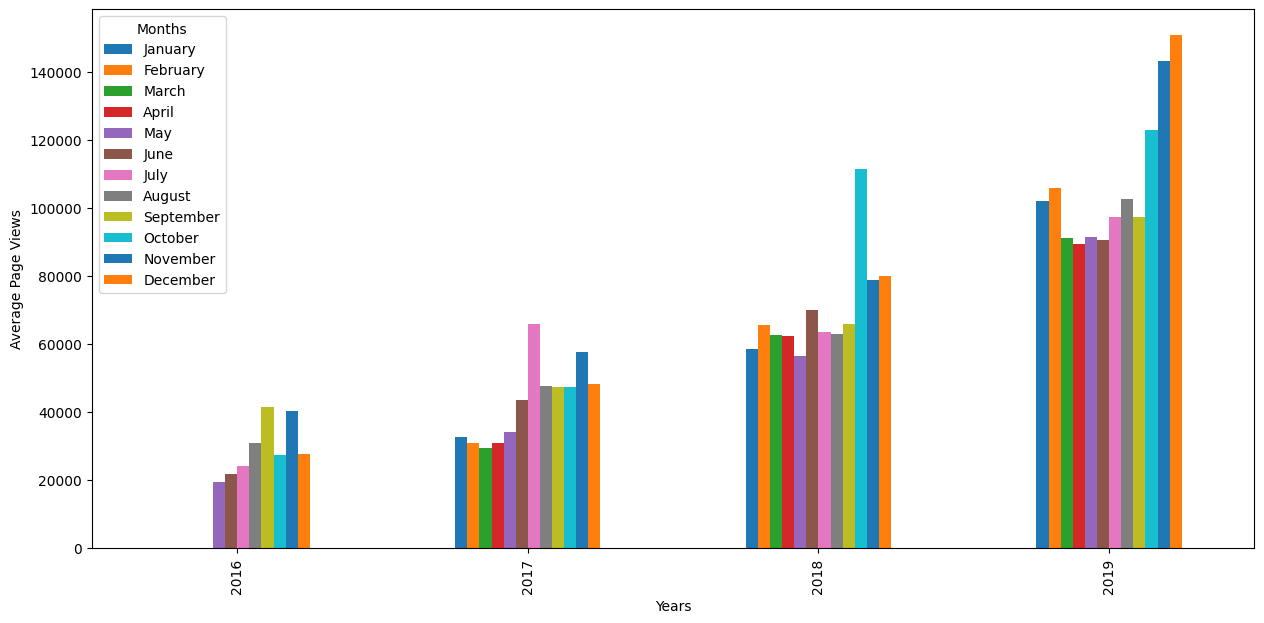

In [ ]:
df_bar = df.groupby([df.index.year.rename('year'), df.index.month.rename('month')])['value'].mean()
df_bar = df_bar.reset_index()
df_bar.columns = ['year', 'month', 'value']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_dict = {
1: 'January', 2: 'February', 3: 'March', 4: 'April',
5: 'May', 6: 'June', 7: 'July', 8: 'August',
9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df_bar['month'] = df_bar['month'].map(month_dict)
print(df_bar.head(10))

# PIVOT the data so months become columns
df_pivot = df_bar.pivot(index='year', columns='month', values='value')
df_pivot = df_pivot[months]  # Reorder columns to match month order


fig = df_pivot.plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(labels=months)

fig.savefig('bar_plot.png')